In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.pyplot as plt

### read *.CSV data file
fLoc = "../Data/" 

fName0 = "a.xlsx"
fName1 = "b1.xlsx"
fName2 = "b2.xlsx"
fName3 = "b3.xlsx"
fName4 = "b4.xlsx"

data0 = pd.read_excel(fLoc + fName0, header = 0, dtype=float)
data1 = pd.read_excel(fLoc + fName1, header = 0, dtype=float)
data2 = pd.read_excel(fLoc + fName2, header = 0, dtype=float)
data3 = pd.read_excel(fLoc + fName3, header = 0, dtype=float)
data4 = pd.read_excel(fLoc + fName4, header = 0, dtype=float)


a = data0.to_numpy()
b1 = data1.to_numpy()
b2 = data2.to_numpy()
b3 = data3.to_numpy()
b4 = data4.to_numpy()

print(a[1])
print(len(b1))

[22.5 -7.1]
15


[23.6, 32.5, 29.6, 26.6, 23.4]
y=ax+b, [a,b]= [ 0.04895434 -1.14870092] 
variance [[ 4.10650529e-06 -1.11450553e-04]
 [-1.11450553e-04  3.07535358e-03]]
   Estimate  Std. Error      lwCI      upCI
a  0.048954    0.002026  0.044983  0.052926
b -1.148701    0.055456 -1.257392 -1.040009


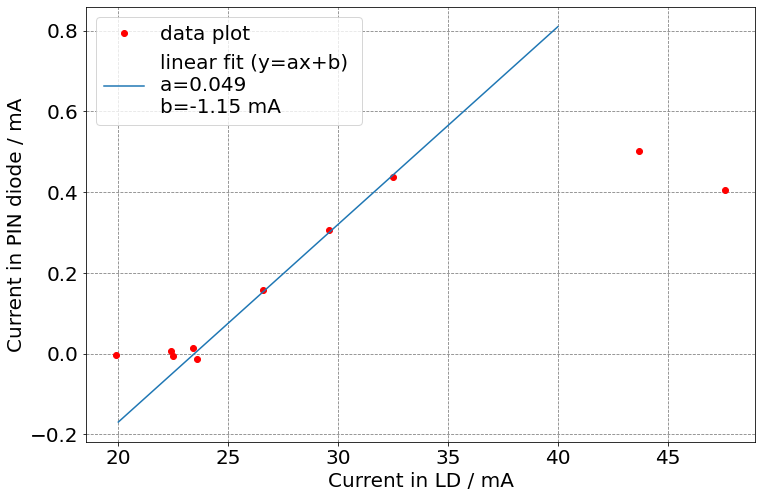

y=0 at
23.46473887461826 mA


In [2]:
ILD = []
IPIN = []
for i in range(0, len(a)):
    ILD.append(a[i][0])
    IPIN.append(a[i][1]/1000)
print([ILD[2],ILD[5],ILD[6],ILD[7],ILD[8]])
    
def line(x, a, b):
    return a*x + b

# initial fit parameters x0, gamma0
p0 = (0,1)

# actual fitting
popt,pocv = curve_fit(line, [ILD[2],ILD[5],ILD[6],ILD[7],ILD[8]], [IPIN[2],IPIN[5],IPIN[6],IPIN[7],IPIN[8]], p0)
print("y=ax+b, [a,b]=", popt, "\nvariance",pocv)

x = np.linspace(20, 40)
y = popt[0]*x + popt[1]

StdE = np.sqrt(np.diag(pocv))

# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE

# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("a", "b"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)

rounda = round(popt[0],3)
roundb = round(popt[1],2)

plt.figure(figsize=(12, 8))
plt.grid(color = "gray", linestyle="--")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Current in LD / mA', fontsize = 20) # x axis label
plt.ylabel('Current in PIN diode / mA', fontsize = 20) # y axis label

plt.plot(ILD, IPIN,"o" ,color="red", label="data plot")
plt.plot(x,y, label=f"linear fit (y=ax+b) \na={rounda} \nb={roundb} mA")

plt.legend(fontsize=20) # add legend
plt.show()

print("y=0 at")
print(-popt[1]/popt[0], "mA")

           Estimate  Std. Error       lwCI        upCI
Isat mA    0.004040    0.001042   0.001998    0.006082
Ut mV    110.032102    5.488787  99.274277  120.789927
Ipr mA     0.153459    0.006152   0.141401    0.165516
           Estimate  Std. Error        lwCI        upCI
Isat mA    0.011513    0.002015    0.007564    0.015461
Ut mV    134.532096    5.475984  123.799365  145.264828
Ipr mA     0.289012    0.006315    0.276635    0.301389
           Estimate  Std. Error        lwCI        upCI
Isat mA    0.016158    0.003237    0.009813    0.022503
Ut mV    141.944698    7.484236  127.275865  156.613530
Ipr mA     0.392471    0.007896    0.376995    0.407948
           Estimate  Std. Error        lwCI        upCI
Isat mA    0.030665    0.006461    0.018003    0.043328
Ut mV    164.482215   10.007321  144.868227  184.096204
Ipr mA     0.492907    0.011762    0.469854    0.515959


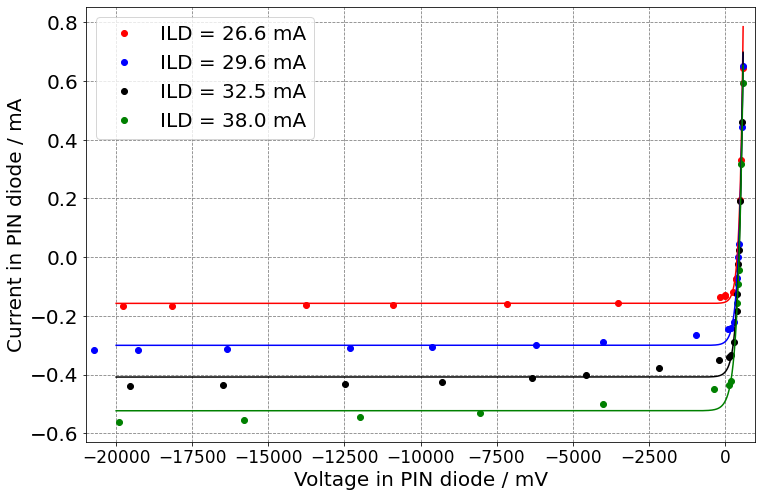

[-0.075, 0.645, 0.332, 0.194, -0.076, -0.119, -0.128, -0.132, -0.135, -0.156, -0.16, -0.163, -0.164, -0.166, -0.167]
           Estimate  Std. Error       lwCI        upCI
Isat mA    0.004040    0.001042   0.001998    0.006082
Ut mV    110.032102    5.488787  99.274277  120.789927
Ipr mA     0.153459    0.006152   0.141401    0.165516
           Estimate  Std. Error        lwCI        upCI
Isat mA    0.011513    0.002015    0.007564    0.015461
Ut mV    134.532096    5.475984  123.799365  145.264828
Ipr mA     0.289012    0.006315    0.276635    0.301389
           Estimate  Std. Error        lwCI        upCI
Isat mA    0.016158    0.003237    0.009813    0.022503
Ut mV    141.944698    7.484236  127.275865  156.613530
Ipr mA     0.392471    0.007896    0.376995    0.407948
           Estimate  Std. Error        lwCI        upCI
Isat mA    0.030665    0.006461    0.018003    0.043328
Ut mV    164.482215   10.007321  144.868227  184.096204
Ipr mA     0.492907    0.011762    0.469854    

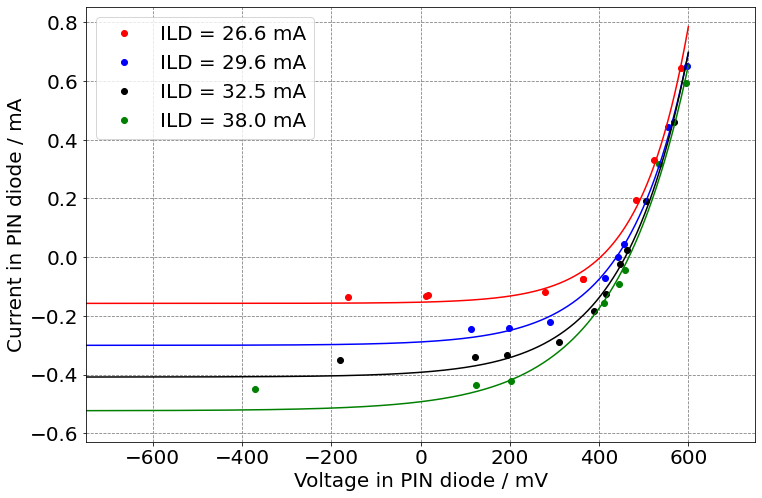

In [3]:
ILD = [26.6, 29.6, 32.5, 38.0]

IPIN1 = []
VPIN1 = []
for i in range(0, len(b1)):
    VPIN1.append(b1[i][0])
    IPIN1.append(b1[i][1])
    
IPIN2 = []
VPIN2 = []
for i in range(0, len(b2)):
    VPIN2.append(b2[i][0])
    IPIN2.append(b2[i][1])
    
IPIN3 = []
VPIN3 = []
for i in range(0, len(b3)):
    VPIN3.append(b3[i][0])
    IPIN3.append(b3[i][1])
    
IPIN4 = []
VPIN4 = []
for i in range(0, len(b4)):
    VPIN4.append(b4[i][0])
    IPIN4.append(b4[i][1])

Isat = []
Ut = []
Ipr = []

def IV(x, Isat, Ut, Ipr):
        return Isat*(np.exp(x/Ut)-1) - Ipr
def fit(x, y, xmin, xmax, color):
    # initial fit parameters x0, gamma0
    p0 = (0,200,0)

    # actual fitting
    popt,pcov = curve_fit(IV, x, y, p0)
    
    Isat.append(popt[0])
    Ut.append(popt[1])
    Ipr.append(popt[2])

    StdE = np.sqrt(np.diag(pcov))

    # estimate 95% confidence interval
    alpha=0.025
    lwCI = popt + norm.ppf(q=alpha)*StdE
    upCI = popt + norm.ppf(q=1-alpha)*StdE

    # print result
    mat = np.vstack((popt,StdE, lwCI, upCI)).T
    df=pd.DataFrame(mat,index=("Isat mA", "Ut mV", "Ipr mA"),
    columns=("Estimate", "Std. Error", "lwCI", "upCI"))
    print(df)
    
    V = np.linspace(xmin, xmax, 10000)
    plt.plot(V, IV(V, popt[0], popt[1], popt[2]), "-", color = color)
    

plt.figure(figsize=(12, 8))
plt.grid(color = "gray", linestyle="--")
plt.xlim(-21000, 1000)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 20)
plt.xlabel('Voltage in PIN diode / mV', fontsize = 20) # x axis label
plt.ylabel('Current in PIN diode / mA', fontsize = 20) # y axis label

plt.plot(VPIN1, IPIN1,"o" ,color="red", label="ILD = 26.6 mA")
plt.plot(VPIN2, IPIN2,"o" ,color="blue", label="ILD = 29.6 mA")
plt.plot(VPIN3, IPIN3,"o" ,color="black", label="ILD = 32.5 mA")
plt.plot(VPIN4, IPIN4,"o" ,color="green", label="ILD = 38.0 mA")

fit(VPIN1, IPIN1, -20000, 600, "red")
fit(VPIN2, IPIN2, -20000, 600, "blue")
fit(VPIN3, IPIN3, -20000, 600, "black")
fit(VPIN4, IPIN4, -20000, 600, "green")

plt.legend(fontsize = 20 ) # add legend
plt.show()

print(IPIN1)


plt.figure(figsize=(12, 8))
plt.grid(color = "gray", linestyle="--")
plt.xlim(-750, 750)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Voltage in PIN diode / mV', fontsize = 20) # x axis label
plt.ylabel('Current in PIN diode / mA', fontsize = 20) # y axis label

plt.plot(VPIN1, IPIN1,"o" ,color="red", label="ILD = 26.6 mA")
plt.plot(VPIN2, IPIN2,"o" ,color="blue", label="ILD = 29.6 mA")
plt.plot(VPIN3, IPIN3,"o" ,color="black", label="ILD = 32.5 mA")
plt.plot(VPIN4, IPIN4,"o" ,color="green", label="ILD = 38.0 mA")

Isat = []
Ut = []
Ipr = []

fit(VPIN1, IPIN1, -1000, 600, "red")
fit(VPIN2, IPIN2, -1000, 600, "blue")
fit(VPIN3, IPIN3, -1000, 600, "black")
fit(VPIN4, IPIN4, -1000, 600, "green")

plt.legend(fontsize = 20 ) # add legend
plt.show()

little slope in green line in UPIN<0 ?

In [4]:
VPIN0 = []
for i in [0,1,2,3]:
    VPIN0.append(Ut[i]*np.log(Ipr[i]/Isat[i]-1))

print(VPIN0)

[397.2659168567235, 428.1294453188204, 446.84272443992757, 446.23319477127706]


UPIN in each LD current is the point on x-axis

    Estimate  Std. Error       lwCI       upCI
a  45.042794    6.372785  32.552365  57.533223
b   0.000022    0.000030  -0.000036   0.000080


C:\Users\SHUNSU~1\AppData\Local\Temp/ipykernel_13076/723369219.py:2: RuntimeWarning: invalid value encountered in log
  return a*np.log(x/b+1)


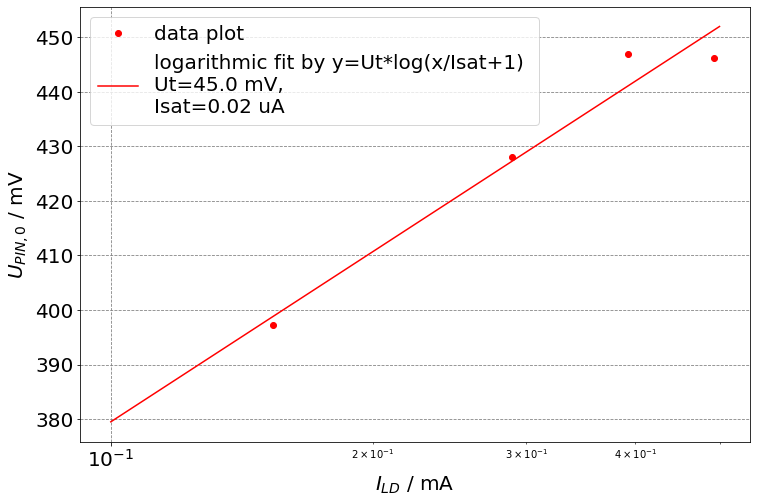

    Estimate  Std. Error       lwCI       upCI
a  45.042794    6.372785  32.552365  57.533223
b   0.000022    0.000030  -0.000036   0.000080


C:\Users\SHUNSU~1\AppData\Local\Temp/ipykernel_13076/723369219.py:2: RuntimeWarning: invalid value encountered in log
  return a*np.log(x/b+1)


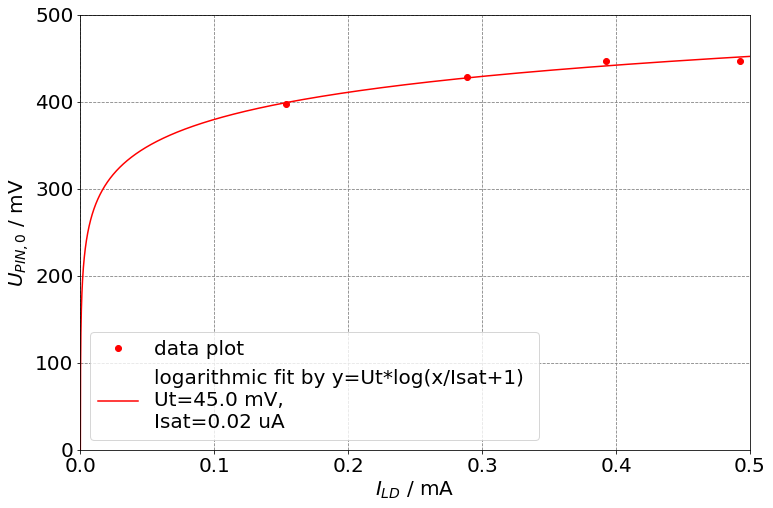

In [5]:
def log(x, a, b):
        return a*np.log(x/b+1)
def logfit(x, y, xmin, xmax, color):
    # initial fit parameters x0, gamma0
    p0 = (150,1000)

    # actual fitting
    popt,pcov = curve_fit(log, x, y, p0)
    
    rounda=round(popt[0],0)
    roundb=round(popt[1]*1000, 2)

    StdE = np.sqrt(np.diag(pcov))

    # estimate 95% confidence interval
    alpha=0.025
    lwCI = popt + norm.ppf(q=alpha)*StdE
    upCI = popt + norm.ppf(q=1-alpha)*StdE

    # print result
    mat = np.vstack((popt,StdE, lwCI, upCI)).T
    df=pd.DataFrame(mat,index=("a", "b"),
    columns=("Estimate", "Std. Error", "lwCI", "upCI"))
    print(df)
    
    x = np.linspace(xmin, xmax, 10000)
    plt.plot(x, log(x, popt[0], popt[1]), "-", color = color, label=f"logarithmic fit by y=Ut*log(x/Isat+1) \nUt={rounda} mV, \nIsat={roundb} uA")


plt.figure(figsize=(12, 8))
plt.grid(color = "gray", linestyle="--")
# plt.xlim(0, 0.5)
# plt.ylim(0, 500)
plt.xscale('log') #対数表示
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$I_{LD}}$ / mA', fontsize = 20) # y axis label
plt.ylabel('$U_{PIN,0}}$ / mV', fontsize = 20) # x axis label

plt.plot(Ipr, VPIN0,"o" ,color="red", label="data plot")
logfit(Ipr, VPIN0, 0.1, 0.5, "red")
plt.legend(fontsize = 20 ) # add legend
plt.show()

plt.figure(figsize=(12, 8))
plt.grid(color = "gray", linestyle="--")
plt.xlim(0, 0.5)
plt.ylim(0, 500)
# plt.xscale('log') #対数表示
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$I_{LD}}$ / mA', fontsize = 20) # y axis label
plt.ylabel('$U_{PIN,0}}$ / mV', fontsize = 20) # x axis label

plt.plot(Ipr, VPIN0,"o" ,color="red", label="data plot")
logfit(Ipr, VPIN0, 0, 0.5, "red")
plt.legend(fontsize = 20 ) # add legend
plt.show()

UPIN vs Ipr(∝ILD) should be logarithmic form. (Ut=kt/e and Isat is actually different in each LD current but it should be constant. I dont know why it is not const)

plot as UPIN,0 = Ut*ln(Ipr/Isat-1) in each LD current, derived from (16), Ipin=0.

In [6]:
Ra = 10*10**3
VPINlarge = []
for i in [0,1,2,3]:
    VPINlarge.append(Ipr[i]/((Isat[i]/Ut[i])+(1/Ra)))

      Estimate  Std. Error        lwCI         upCI
a  1908.691838  703.714952  529.435877  3287.947799
b   925.400821  249.810852  435.780548  1415.021095
     Estimate  Std. Error        lwCI        upCI
a  795.421527   39.293679  718.407332  872.435722
b   31.466480   13.948812    4.127311   58.805649


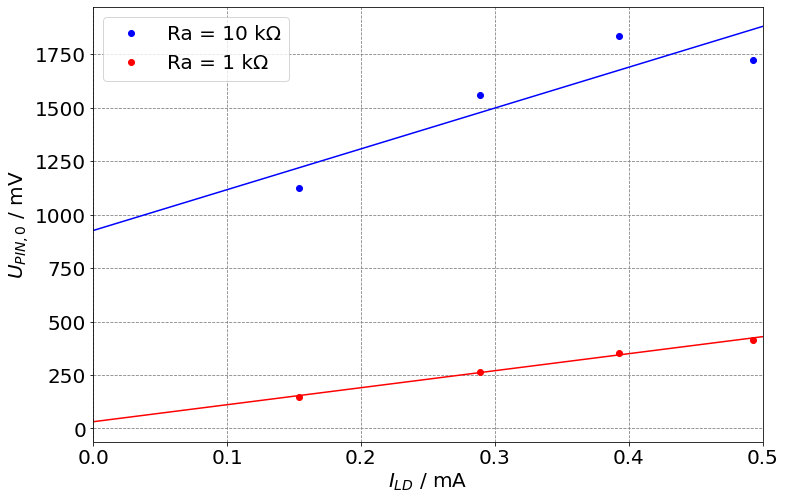

In [7]:
Ra = 1*10**3
VPINsmall = []
for i in [0,1,2,3]:
    VPINsmall.append(Ipr[i]/((Isat[i]/Ut[i])+(1/Ra)))


def line(x, a, b):
        return a*x+b
def linefit(x, y, xmin, xmax, color):
    # initial fit parameters x0, gamma0
    p0 = (1,1)

    # actual fitting
    popt,pcov = curve_fit(line, x, y, p0)

    StdE = np.sqrt(np.diag(pcov))

    # estimate 95% confidence interval
    alpha=0.025
    lwCI = popt + norm.ppf(q=alpha)*StdE
    upCI = popt + norm.ppf(q=1-alpha)*StdE

    # print result
    mat = np.vstack((popt,StdE, lwCI, upCI)).T
    df=pd.DataFrame(mat,index=("a", "b"),
    columns=("Estimate", "Std. Error", "lwCI", "upCI"))
    print(df)
    
    x = np.linspace(xmin, xmax, 10000)
    plt.plot(x, line(x, popt[0], popt[1]), "-", color = color)
    


    

plt.figure(figsize=(12, 8))
plt.grid(color = "gray", linestyle="--")
plt.xlim(0, 0.5)
# plt.ylim(0, 500)
# plt.xscale('log') #対数表示
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$I_{LD}}$ / mA', fontsize = 20) # y axis label
plt.ylabel('$U_{PIN,0}}$ / mV', fontsize = 20) # x axis label

plt.plot(Ipr, VPINlarge,"o" ,color="blue", label="Ra = 10 kΩ")
linefit(Ipr, VPINlarge, 0, 0.5, "blue")
plt.plot(Ipr, VPINsmall,"o" ,color="red", label="Ra = 1 kΩ")
linefit(Ipr, VPINsmall, 0, 0.5, "red")

plt.legend(fontsize = 20 ) # add legend
plt.show()

better linearity at Ra=1k than Ra = 10k (p11)

plot as Upin =Ipr/(Isat/Ut + 1/Ra) derived from (16), Upin<<Ut, Ipin=-Upin/Ra

             Estimate    Std. Error       lwCI          upCI
Isat mA  3.508088e-03  1.058929e-03   0.001433  5.583551e-03
Ut mA    1.073409e+02  6.010902e+00  95.559728  1.191220e+02
Ipr mA   1.465403e-01  8.894929e-03   0.129107  1.639740e-01
a       -9.509553e-07  8.763129e-07  -0.000003  7.665865e-07
           Estimate    Std. Error        lwCI          upCI
Isat mA    0.009044  1.808814e-03    0.005499  1.258896e-02
Ut mA    128.037389  5.498868e+00  117.259805  1.388150e+02
Ipr mA     0.273286  8.951718e-03    0.255740  2.908306e-01
a         -0.000002  8.323054e-07   -0.000004 -2.488502e-07
           Estimate    Std. Error        lwCI        upCI
Isat mA    0.011240  2.196974e-03    0.006934    0.015546
Ut mA    130.968962  5.985961e+00  119.236694  142.701229
Ipr mA     0.368723  8.861270e-03    0.351356    0.386091
a         -0.000004  9.897185e-07   -0.000006   -0.000002
           Estimate  Std. Error        lwCI        upCI
Isat mA    0.021608    0.004508    0.012772    0.

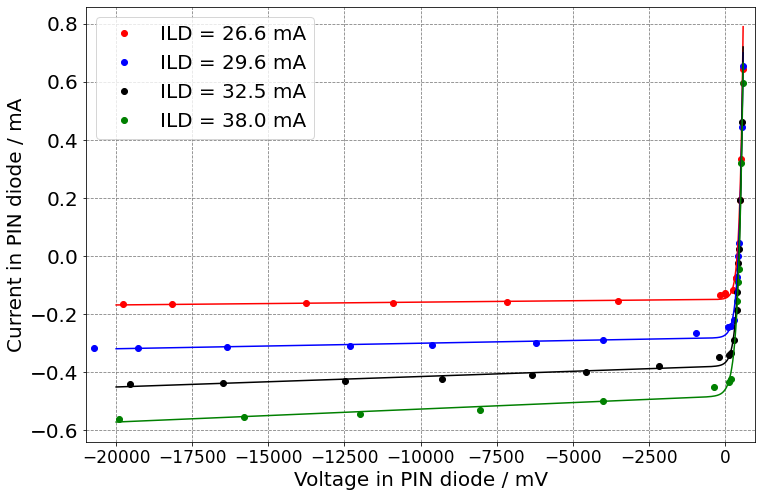

[-0.075, 0.645, 0.332, 0.194, -0.076, -0.119, -0.128, -0.132, -0.135, -0.156, -0.16, -0.163, -0.164, -0.166, -0.167]
             Estimate    Std. Error       lwCI          upCI
Isat mA  3.508088e-03  1.058929e-03   0.001433  5.583551e-03
Ut mA    1.073409e+02  6.010902e+00  95.559728  1.191220e+02
Ipr mA   1.465403e-01  8.894929e-03   0.129107  1.639740e-01
a       -9.509553e-07  8.763129e-07  -0.000003  7.665865e-07
           Estimate    Std. Error        lwCI          upCI
Isat mA    0.009044  1.808814e-03    0.005499  1.258896e-02
Ut mA    128.037389  5.498868e+00  117.259805  1.388150e+02
Ipr mA     0.273286  8.951718e-03    0.255740  2.908306e-01
a         -0.000002  8.323054e-07   -0.000004 -2.488502e-07
           Estimate    Std. Error        lwCI        upCI
Isat mA    0.011240  2.196974e-03    0.006934    0.015546
Ut mA    130.968962  5.985961e+00  119.236694  142.701229
Ipr mA     0.368723  8.861270e-03    0.351356    0.386091
a         -0.000004  9.897185e-07   -0.000006 

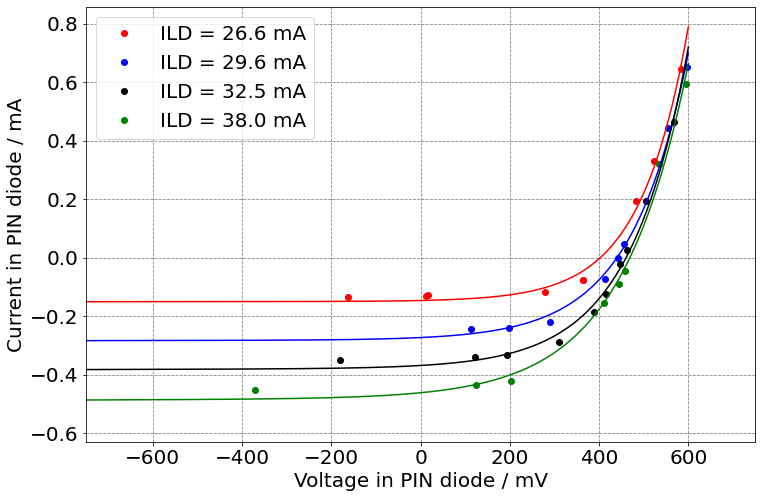

[-0.075, 0.645, 0.332, 0.194, -0.076, -0.119, -0.128, -0.132, -0.135, -0.156, -0.16, -0.163, -0.164, -0.166, -0.167]


In [8]:
IPIN1 = []
VPIN1 = []
for i in range(0, len(b1)):
    VPIN1.append(b1[i][0])
    IPIN1.append(b1[i][1])
    
IPIN2 = []
VPIN2 = []
for i in range(0, len(b2)):
    VPIN2.append(b2[i][0])
    IPIN2.append(b2[i][1])
    
IPIN3 = []
VPIN3 = []
for i in range(0, len(b3)):
    VPIN3.append(b3[i][0])
    IPIN3.append(b3[i][1])
    
IPIN4 = []
VPIN4 = []
for i in range(0, len(b4)):
    VPIN4.append(b4[i][0])
    IPIN4.append(b4[i][1])


def IV(x, Isat, Ut, Ipr, a):
        return Isat*(np.exp(x/Ut)-1) - Ipr - a*x
def fit(x, y, xmin, xmax, color):
    # initial fit parameters x0, gamma0
    p0 = (0,200,0, 0)

    # actual fitting
    popt,pcov = curve_fit(IV, x, y, p0)

    StdE = np.sqrt(np.diag(pcov))

    # estimate 95% confidence interval
    alpha=0.025
    lwCI = popt + norm.ppf(q=alpha)*StdE
    upCI = popt + norm.ppf(q=1-alpha)*StdE

    # print result
    mat = np.vstack((popt,StdE, lwCI, upCI)).T
    df=pd.DataFrame(mat,index=("Isat mA", "Ut mA", "Ipr mA", "a"),
    columns=("Estimate", "Std. Error", "lwCI", "upCI"))
    print(df)
    
    V = np.linspace(xmin, xmax, 10000)
    plt.plot(V, IV(V, popt[0], popt[1], popt[2], popt[3]), "-", color = color)
    

plt.figure(figsize=(12, 8))
plt.grid(color = "gray", linestyle="--")
plt.xlim(-21000, 1000)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 20)
plt.xlabel('Voltage in PIN diode / mV', fontsize = 20) # x axis label
plt.ylabel('Current in PIN diode / mA', fontsize = 20) # y axis label

plt.plot(VPIN1, IPIN1,"o" ,color="red", label="ILD = 26.6 mA")
plt.plot(VPIN2, IPIN2,"o" ,color="blue", label="ILD = 29.6 mA")
plt.plot(VPIN3, IPIN3,"o" ,color="black", label="ILD = 32.5 mA")
plt.plot(VPIN4, IPIN4,"o" ,color="green", label="ILD = 38.0 mA")

fit(VPIN1, IPIN1, -20000, 600, "red")
fit(VPIN2, IPIN2, -20000, 600, "blue")
fit(VPIN3, IPIN3, -20000, 600, "black")
fit(VPIN4, IPIN4, -20000, 600, "green")

plt.legend(fontsize = 20 ) # add legend
plt.show()

print(IPIN1)


plt.figure(figsize=(12, 8))
plt.grid(color = "gray", linestyle="--")
plt.xlim(-750, 750)
# plt.yscale('log') #対数表示
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Voltage in PIN diode / mV', fontsize = 20) # x axis label
plt.ylabel('Current in PIN diode / mA', fontsize = 20) # y axis label

plt.plot(VPIN1, IPIN1,"o" ,color="red", label="ILD = 26.6 mA")
plt.plot(VPIN2, IPIN2,"o" ,color="blue", label="ILD = 29.6 mA")
plt.plot(VPIN3, IPIN3,"o" ,color="black", label="ILD = 32.5 mA")
plt.plot(VPIN4, IPIN4,"o" ,color="green", label="ILD = 38.0 mA")


fit(VPIN1, IPIN1, -1000, 600, "red")
fit(VPIN2, IPIN2, -1000, 600, "blue")
fit(VPIN3, IPIN3, -1000, 600, "black")
fit(VPIN4, IPIN4, -1000, 600, "green")

plt.legend(fontsize = 20 ) # add legend
plt.show()

print(IPIN1)


Is it better fitting to add a term ax to Ipin?